In [1]:
import os
import glob
import cv2

path = 'C:/Users/Callum/Desktop/cab420/CAB420Assignment1A/UTKFace/*.jpg'
files = glob.glob('C:/Users/Callum/Documents/UTKFace/UTKFace/*.jpg')
data = []
y = []
for f in files:
    d = {}
    head, tail = os.path.split(f)
    parts = tail.split('_')
    if (len(parts) == 4):
#         if(int(int(parts[0])/10) == 0 or int(int(parts[0])/10) == 1 or int(int(parts[0])/10) == 2 or int(int(parts[0])/10) == 3 or int(int(parts[0])/10) == 4):
        d['age'] = int(parts[0])
        d['gender'] = int(parts[1])
        d['race'] = int(parts[2])
        d['image'] = cv2.imread(f)
        y.append(int(int(parts[0])/10))
        data.append(d)
    else:
        print('Could not load: ' + f + '! Incorrectly formatted filename')
old_data = data


Could not load: C:/Users/Callum/Documents/UTKFace/UTKFace\39_1_20170116174525125.jpg.chip.jpg! Incorrectly formatted filename
Could not load: C:/Users/Callum/Documents/UTKFace/UTKFace\61_1_20170109142408075.jpg.chip.jpg! Incorrectly formatted filename
Could not load: C:/Users/Callum/Documents/UTKFace/UTKFace\61_1_20170109150557335.jpg.chip.jpg! Incorrectly formatted filename


In [2]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorboard import notebook
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorboard import notebook

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import scipy.io
import numpy
# numpy.set_printoptions(threshold=numpy.inf)
import sklearn
import os
import datetime
# import pydot
import IPython
from IPython.display import SVG
import matplotlib.pyplot as plt
import sys
import scipy.io
import numpy
import cv2

In [38]:
def train_and_eval(model, x_train, y_train, x_test, y_test, filename, batch_size, epochs, class_weights):
    
    checkpoint = ModelCheckpoint(filename, verbose=1, monitor='val_loss',save_best_only=True, mode='auto')
    
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        callbacks=[checkpoint],
                        class_weight=class_weights)    
    
    model.load_weights(filename)
    model.save(filename)    
    
    fig = plt.figure(figsize=[30, 10])
    ax = fig.add_subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    ax.legend()
    ax.set_title('Training Performance')

    
    ax = fig.add_subplot(1, 3, 2)
    pred = model.predict(x_train);
    indexes = tf.argmax(pred, axis=1)
    cm = confusion_matrix(y_train, indexes)
    c = ConfusionMatrixDisplay(cm, display_labels=range(1,11))
    c.plot(ax = ax)    
    ax.set_title('Training')
    
    ax = fig.add_subplot(1, 3, 3)
    pred = model.predict(x_test);
    indexes = tf.argmax(pred, axis=1)
    cm = confusion_matrix(y_test, indexes)
    c = ConfusionMatrixDisplay(cm, display_labels=range(1,11))
    c.plot(ax = ax)    
    ax.set_title('Testing')

In [3]:
def conv_block(inputs, filters, spatial_dropout = 0.0, max_pool = True):
    
    x = layers.Conv2D(filters=filters, kernel_size=(3,3), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(filters=filters, kernel_size=(3,3), padding='same', activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    if (spatial_dropout > 0.0):
        x = layers.SpatialDropout2D(spatial_dropout)(x)
    if (max_pool == True):
        x = layers.MaxPool2D(pool_size=(2, 2))(x)
    
    return x

def fc_block(inputs, size, dropout):
    x = layers.Dense(size, activation=None)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    if (dropout > 0.0):
        x = layers.Dropout(dropout)(x)
    
    return x

def vgg_net(inputs, filters, fc, spatial_dropout = 0.0, dropout = 0.0):
    
    x = inputs
    for idx,i in enumerate(filters):
        x = conv_block(x, i, spatial_dropout, not (idx==len(filters) - 1))
    
    x = layers.Flatten()(x)
    
    for i in fc:
        x = fc_block(x, i, dropout)
        
    return x

In [5]:
batch_size = 128;
num_epochs = 10;

In [6]:
data = numpy.array(data)
print(data[0]['image'].shape)
im = data[0]['image']
width = 32
height = 32
dim = (width, height)
foo = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
print(foo.shape)

(200, 200, 3)
(32, 32, 3)


In [4]:
data = numpy.array(data)
def scale(data):
    images = []
    image_trim = data
    for i,elem in enumerate(image_trim):
        width = 32
        height = 32
        dim = (width, height)
        resized = cv2.resize(elem['image'], dim, interpolation = cv2.INTER_AREA)
        images.append(resized)
        image_trim[i]['image'] = resized
    images2 = numpy.array(images)
    return image_trim, images2

resized_images, images = scale(data)
print(images.shape)

(23705, 32, 32, 3)


In [9]:
print(images.shape)

(5477, 32, 32, 3)


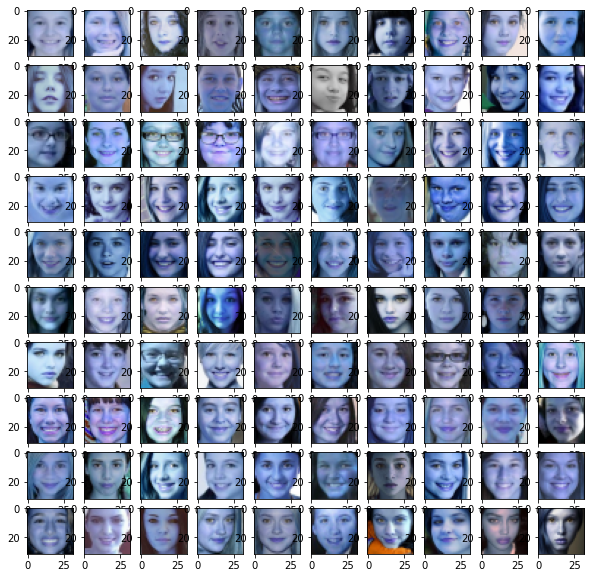

In [24]:
fig = plt.figure(figsize=[10, 10])
for i in range(200,300):
    ax = fig.add_subplot(10, 10, i -199)
    ax.imshow(resized_images[i]['image'])

# fig = plt.figure(figsize=[10, 10])
# for i in range(100):
#     ax = fig.add_subplot(10, 10, i + 1)
#     ax.imshow(old_data[i]['image'])


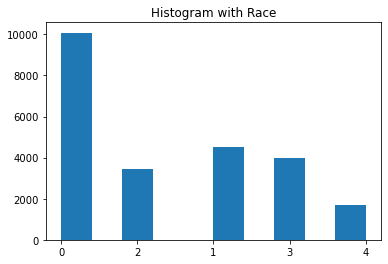

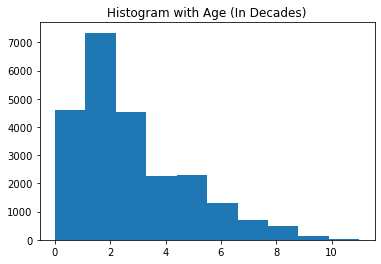

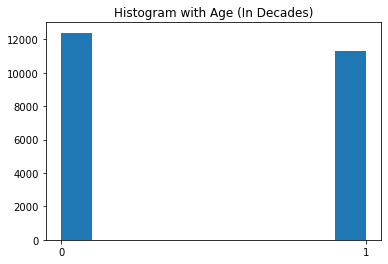

In [4]:
race = []
age = []
gender = []
for i in resized_images:
    race.append(str(i['race']))
    age.append(str(i['age']))
    gender.append(str(i['gender']))

# print(race)
# index = numpy.arange(len(race))
spectral_hist = plt.hist(race) 
plt.title("Histogram with Race")
plt.show()
                      
                      
age_hist = plt.hist(y) 
plt.title("Histogram with Age (In Decades)")
plt.show()

age_hist = plt.hist(gender) 
plt.title("Histogram with Age (In Decades)")
plt.show()

## Creating Train, Test, Val Data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=1-0.8235294, random_state=1)

X_train = numpy.array(X_train) 
y_train = numpy.array(y_train) 
X_test = numpy.array(X_test) 
y_test = numpy.array(y_test)
X_val = numpy.array(X_val) 
y_val = numpy.array(y_val)

print(y_val[0])

6


In [6]:

from sklearn.utils import class_weight
y_train = numpy.array(y_train) 
class_weights = class_weight.compute_class_weight('balanced',
                                                 numpy.unique(y_train.flatten()),
                                                 y_train.flatten())
print(class_weights)
print(X_train.shape)

[  0.63920269   1.28218391   0.27084634   0.43222075   0.87755675
   0.86530363   1.52034657   2.79874552   3.97986748  13.55642361
 118.31060606 162.67708333]
(15617, 32, 32, 3)


In [7]:
datagen = ImageDataGenerator(
                            # rotate between -10, +10 degrees
                            rotation_range=10,
                            # horiziontal shift by +/- 5% of the image width
                            width_shift_range=0.05,
                            # vertical shift by +/- 5% of the image width
                            height_shift_range=0.05,
                            # range for randomly applying a shearing transform
                            shear_range=0.05,
                            # range for zooming
                            zoom_range=0.05,
                            # don't allow horizontal flips of data
                            horizontal_flip=False,
                            # what value to place in new pixels, given the nature of our data (clothes on a black backround)
                            # we'll set this to a constant value of 0
                            fill_mode='constant', cval=0)

In [8]:

num_epochs = 35
inputs = keras.Input(shape=(32, 32, 3, ), name='img')
x = vgg_net(inputs, [16,32,64], [1024, 256], 0.2, 0.2)
output = layers.Dense(12)(x)
model_3stage_cnn1 = keras.Model(inputs=inputs, outputs=output, name='simple_vgg')
model_3stage_cnn1.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model_3stage_cnn1.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                    steps_per_epoch=10000//128,
                    epochs = 100,
                    validation_data = (X_test, y_test), verbose=False, class_weight=class_weights)
                    


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']


4741/4741 - 3s - loss: 1.4886 - accuracy: 0.5256
Test loss: 1.488648267970058
Test accuracy: 0.5256275


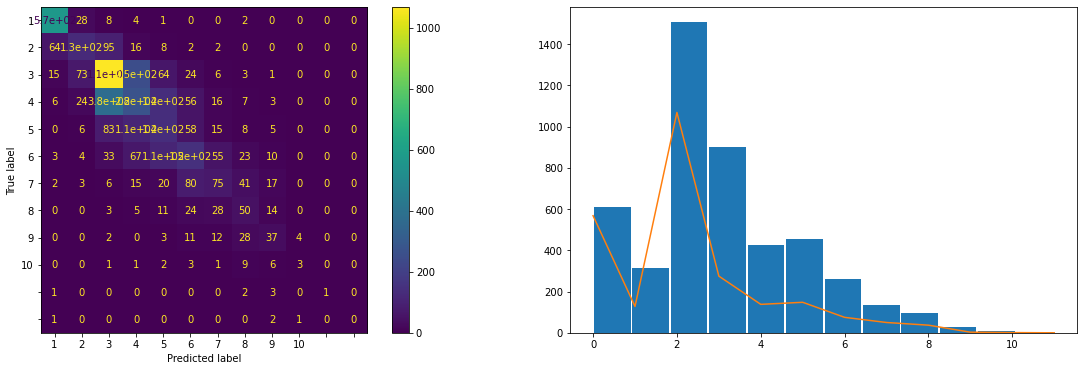

In [11]:
def eval_model(model, x_test, y_test):
    test_scores = model.evaluate(x_test, y_test, verbose=2)
    print('Test loss:', test_scores[0])
    print('Test accuracy:', test_scores[1])

    pred = model.predict(x_test);
    indexes = tf.argmax(pred, axis=1)

    cm = confusion_matrix(y_test, indexes)
    fig = plt.figure(figsize=[20, 6])
    ax = fig.add_subplot(1, 2, 1)
    c = ConfusionMatrixDisplay(cm, display_labels=range(1,11))
    c.plot(ax = ax)

    ax = fig.add_subplot(1, 2, 2)
    ax.hist(y_test, bins=len(numpy.diagonal(cm)), rwidth=0.95)
    ax.plot(numpy.diagonal(cm))
eval_model(model_3stage_cnn1, X_test, y_test)

Text(0.5, 1.0, 'Training Performance')

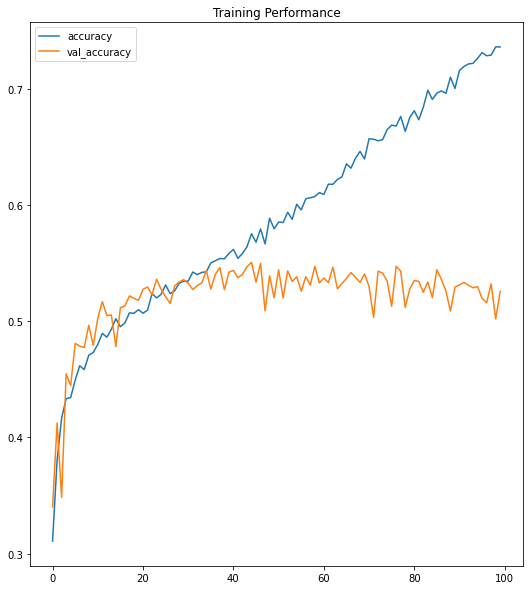

In [9]:
fig = plt.figure(figsize=[30, 10])
ax = fig.add_subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
ax.legend()
ax.set_title('Training Performance')

## Cross Validation

In [24]:
from sklearn.model_selection import KFold 

print(y_test.shape)
def race(race, race_num):
    race_split = []
    race_test = []
    for i, elem in enumerate(race):
        if(elem['race'] == race_num):
            race_split.append(elem['image'])
            race_test.append(int(elem['age']/10))
    return race_split, race_test

race_1, race_1_test = race(old_data, 0)
race_2, race_2_test = race(old_data, 1)
race_3, race_3_test = race(old_data, 2)
race_4, race_4_test = race(old_data, 3)
race_5, race_5_test = race(old_data, 4)
def k_folds_val(X_train, y_train, X_test, y_test):
    X_train = numpy.array(X_train) 
    y_train = numpy.array(y_train) 
    X_test = numpy.array(X_test) 
    y_test = numpy.array(y_test)
    num_epochs = 35
    inputs = keras.Input(shape=(32, 32, 3, ), name='img')
    x = vgg_net(inputs, [16,32,64], [1024, 256], 0.2, 0.2)
    output = layers.Dense(12)(x)
    model_3stage_cnn1 = keras.Model(inputs=inputs, outputs=output, name='simple_vgg')
    model_3stage_cnn1.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    history = model_3stage_cnn1.fit(X_train, y_train,
                            batch_size=128,
                            epochs=20,
                            validation_data=(X_test, y_test), class_weight = class_weights
                       )
    fig = plt.figure(figsize=[30, 10])
    ax = fig.add_subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    ax.legend()
    ax.set_title('Training Performance')


(4741,)


AttributeError: 'list' object has no attribute 'shape'

Train on 22013 samples, validate on 1692 samples
Epoch 1/20
22013/22013 [==============================] - 56s 3ms/sample - loss: 1.8005 - accuracy: 0.3675 - val_loss: 1.4037 - val_accuracy: 0.5000
Epoch 2/20
22013/22013 [==============================] - 49s 2ms/sample - loss: 1.4789 - accuracy: 0.4376 - val_loss: 1.1316 - val_accuracy: 0.5857
Epoch 3/20
22013/22013 [==============================] - 50s 2ms/sample - loss: 1.3690 - accuracy: 0.4711 - val_loss: 1.2616 - val_accuracy: 0.5343
Epoch 4/20
22013/22013 [==============================] - 49s 2ms/sample - loss: 1.2897 - accuracy: 0.4908 - val_loss: 1.1050 - val_accuracy: 0.5680
Epoch 5/20
22013/22013 [==============================] - 49s 2ms/sample - loss: 1.2373 - accuracy: 0.5116 - val_loss: 1.1249 - val_accuracy: 0.5780
Epoch 6/20
22013/22013 [==============================] - 49s 2ms/sample - loss: 1.1950 - accuracy: 0.5202 - val_loss: 0.9213 - val_accuracy: 0.6413
Epoch 7/20
22013/22013 [==============================] -

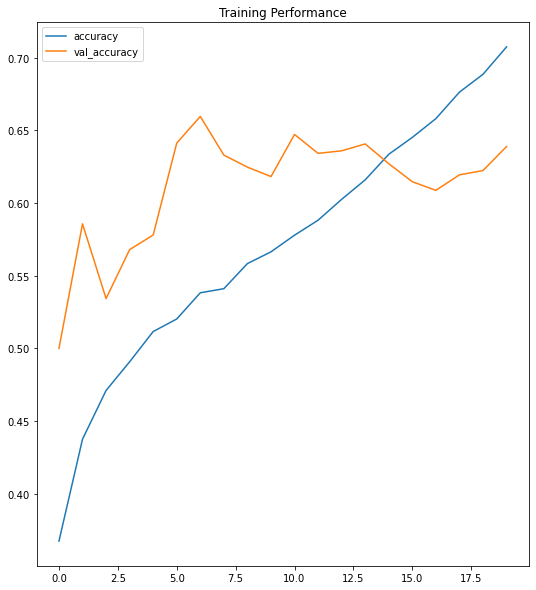

In [22]:
k_folds_val(race_1+race_2+race_3+race_4, race_1_test+race_2_test+race_3_test+race_4_test, race_5, race_5_test)


Train on 19730 samples, validate on 3975 samples
Epoch 1/20
19730/19730 [==============================] - 59s 3ms/sample - loss: 1.7519 - accuracy: 0.3738 - val_loss: 1.4043 - val_accuracy: 0.4719
Epoch 2/20
19730/19730 [==============================] - 49s 3ms/sample - loss: 1.4519 - accuracy: 0.4451 - val_loss: 1.2039 - val_accuracy: 0.5311
Epoch 3/20
19730/19730 [==============================] - 45s 2ms/sample - loss: 1.3382 - accuracy: 0.4795 - val_loss: 1.2888 - val_accuracy: 0.5223
Epoch 4/20
19730/19730 [==============================] - 51s 3ms/sample - loss: 1.2741 - accuracy: 0.4988 - val_loss: 1.2083 - val_accuracy: 0.4853
Epoch 5/20
19730/19730 [==============================] - 49s 2ms/sample - loss: 1.2181 - accuracy: 0.5206 - val_loss: 1.1413 - val_accuracy: 0.5489
Epoch 6/20
19730/19730 [==============================] - 52s 3ms/sample - loss: 1.1771 - accuracy: 0.5285 - val_loss: 1.1807 - val_accuracy: 0.5157
Epoch 7/20
19730/19730 [==============================] -

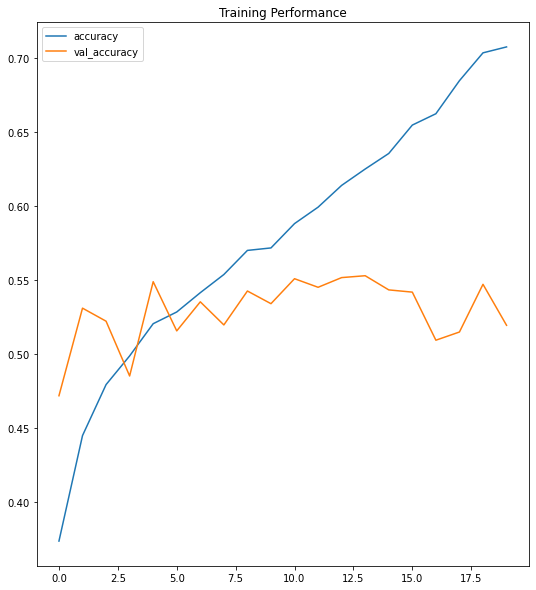

In [25]:
k_folds_val(race_1+race_2+race_3+race_5, race_1_test+race_2_test+race_3_test+race_5_test, race_4, race_4_test)


Train on 20271 samples, validate on 3434 samples
Epoch 1/20
20271/20271 [==============================] - 48s 2ms/sample - loss: 1.7969 - accuracy: 0.3515 - val_loss: 1.5215 - val_accuracy: 0.4237
Epoch 2/20
20271/20271 [==============================] - 49s 2ms/sample - loss: 1.4885 - accuracy: 0.4271 - val_loss: 1.4205 - val_accuracy: 0.4438
Epoch 3/20
20271/20271 [==============================] - 49s 2ms/sample - loss: 1.3854 - accuracy: 0.4595 - val_loss: 1.0954 - val_accuracy: 0.5792
Epoch 4/20
20271/20271 [==============================] - 51s 3ms/sample - loss: 1.3117 - accuracy: 0.4803 - val_loss: 1.0055 - val_accuracy: 0.6226
Epoch 5/20
20271/20271 [==============================] - 54s 3ms/sample - loss: 1.2579 - accuracy: 0.4985 - val_loss: 1.2087 - val_accuracy: 0.5533
Epoch 6/20
20271/20271 [==============================] - 60s 3ms/sample - loss: 1.2167 - accuracy: 0.5140 - val_loss: 1.3072 - val_accuracy: 0.5154
Epoch 7/20
20271/20271 [==============================] -

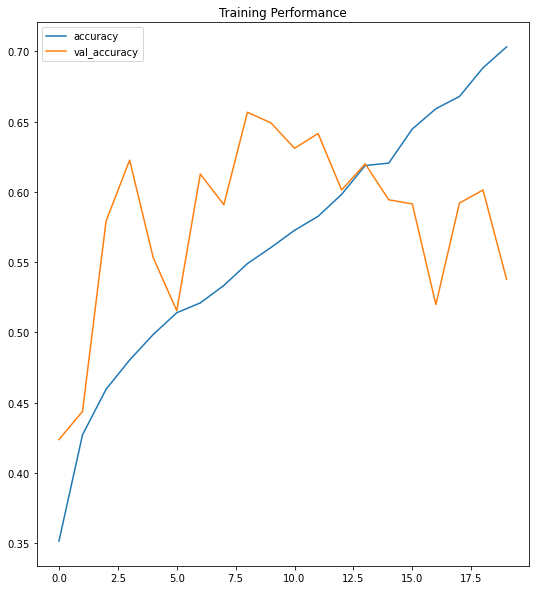

In [26]:
k_folds_val(race_1+race_2+race_5+race_4, race_1_test+race_2_test+race_5_test+race_4_test, race_3, race_3_test)


Train on 19179 samples, validate on 4526 samples
Epoch 1/20
19179/19179 [==============================] - 48s 2ms/sample - loss: 1.7569 - accuracy: 0.3786 - val_loss: 1.6610 - val_accuracy: 0.3893
Epoch 2/20
19179/19179 [==============================] - 46s 2ms/sample - loss: 1.4193 - accuracy: 0.4608 - val_loss: 1.4379 - val_accuracy: 0.4355
Epoch 3/20
19179/19179 [==============================] - 45s 2ms/sample - loss: 1.3100 - accuracy: 0.4947 - val_loss: 1.4459 - val_accuracy: 0.4269
Epoch 4/20
19179/19179 [==============================] - 48s 2ms/sample - loss: 1.2414 - accuracy: 0.5129 - val_loss: 1.3833 - val_accuracy: 0.4317
Epoch 5/20
19179/19179 [==============================] - 45s 2ms/sample - loss: 1.1883 - accuracy: 0.5296 - val_loss: 1.3640 - val_accuracy: 0.4631
Epoch 6/20
19179/19179 [==============================] - 46s 2ms/sample - loss: 1.1414 - accuracy: 0.5470 - val_loss: 1.4120 - val_accuracy: 0.4366
Epoch 7/20
19179/19179 [==============================] -

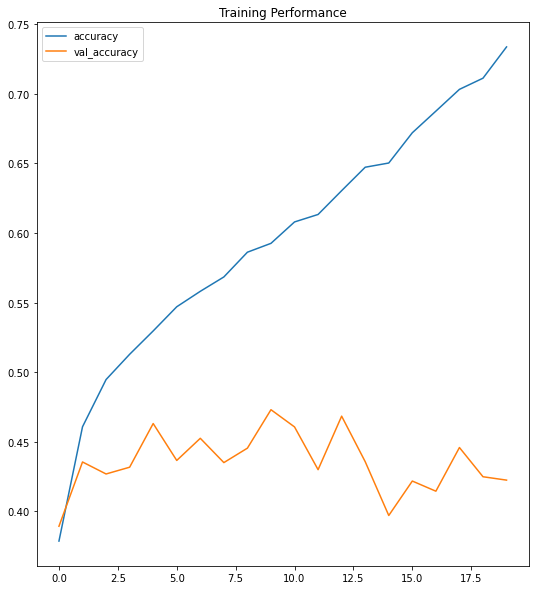

In [27]:
k_folds_val(race_1+race_5+race_3+race_4, race_1_test+race_5_test+race_3_test+race_4_test, race_2, race_2_test)


Train on 13627 samples, validate on 10078 samples
Epoch 1/20
13627/13627 [==============================] - 38s 3ms/sample - loss: 1.8144 - accuracy: 0.3960 - val_loss: 2.0408 - val_accuracy: 0.2848
Epoch 2/20
13627/13627 [==============================] - 37s 3ms/sample - loss: 1.5855 - accuracy: 0.4624 - val_loss: 2.0336 - val_accuracy: 0.2632
Epoch 3/20
13627/13627 [==============================] - 37s 3ms/sample - loss: 1.5039 - accuracy: 0.4845 - val_loss: 1.9817 - val_accuracy: 0.3014
Epoch 4/20
13627/13627 [==============================] - 38s 3ms/sample - loss: 1.4459 - accuracy: 0.4965 - val_loss: 1.8868 - val_accuracy: 0.3326
Epoch 5/20
13627/13627 [==============================] - 37s 3ms/sample - loss: 1.3863 - accuracy: 0.5118 - val_loss: 1.8024 - val_accuracy: 0.3277
Epoch 6/20
13627/13627 [==============================] - 43s 3ms/sample - loss: 1.3427 - accuracy: 0.5258 - val_loss: 1.9335 - val_accuracy: 0.2965
Epoch 7/20
13627/13627 [==============================] 

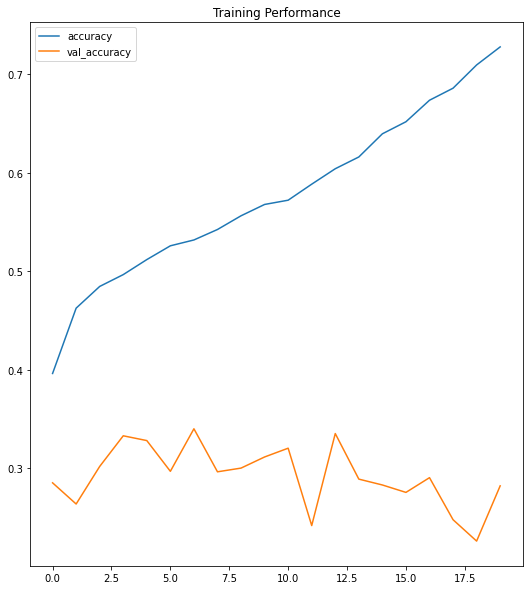

In [29]:
k_folds_val(race_2+race_5+race_3+race_4, race_5_test+race_2_test+race_3_test+race_4_test, race_1, race_1_test)
